In [ ]:
pip install pycryptodome pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


Saving sample_input.png to sample_input (3).png
Enter password for encryption: EncryptThisImage


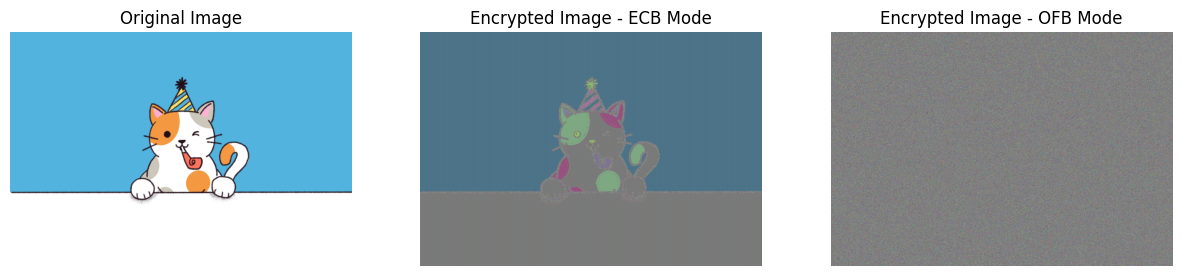

In [ ]:
import os
from google.colab import files
from Crypto.Cipher import DES
from Crypto.Protocol.KDF import scrypt
from Crypto.Util.Padding import pad, unpad
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def derive_des_key(password):
    salt = os.urandom(16)
    key = scrypt(password.encode(), salt, key_len=8, N=2**14, r=8, p=1)
    return key

def encrypt_image(image_path, password, mode):
    img = Image.open(image_path).convert('RGB')
    pixel_array = np.array(img)

    pixel_bytes = pixel_array.tobytes()

    des_key = derive_des_key(password)

    if mode == 'ECB':
        cipher = DES.new(des_key, DES.MODE_ECB)
        # Padding is applied only in ECB mode
        padded_pixel_bytes = pad(pixel_bytes, DES.block_size)
        encrypted_bytes = cipher.encrypt(padded_pixel_bytes)
    elif mode == 'OFB':
        iv = os.urandom(8)
        cipher = DES.new(des_key, DES.MODE_OFB, iv=iv)
        # No padding for OFB mode
        encrypted_bytes = cipher.encrypt(pixel_bytes)

    encrypted_pixel_array = np.frombuffer(encrypted_bytes, dtype=np.uint8)
    encrypted_pixel_array = encrypted_pixel_array[:len(pixel_array.flatten())].reshape(pixel_array.shape)

    encrypted_img = Image.fromarray(encrypted_pixel_array, 'RGB')

    return encrypted_img

def display_and_save_images(image_path, password):
    encrypted_ecb_img = encrypt_image(image_path, password, 'ECB')
    encrypted_ecb_img.save('encrypted_ecb_image.png')

    encrypted_ofb_img = encrypt_image(image_path, password, 'OFB')
    encrypted_ofb_img.save('encrypted_ofb_image.png')

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    original_img = Image.open(image_path).convert('RGB')
    axs[0].imshow(original_img)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(encrypted_ecb_img)
    axs[1].set_title("Encrypted Image - ECB Mode")
    axs[1].axis('off')

    axs[2].imshow(encrypted_ofb_img)
    axs[2].set_title("Encrypted Image - OFB Mode")
    axs[2].axis('off')

    plt.show()

if __name__ == "__main__":
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]  # Get the uploaded file's path

    password = input("Enter password for encryption: ")

    display_and_save_images(image_path, password)
